In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#one, two, three = three_level_basis()
two, three, one = three_level_basis()
sig11 = one * one.dag()
sig22 = two * two.dag()
sig33 = three * three.dag()
sig13 = one * three.dag()
sig23 = two * three.dag()
sig12 = one * two.dag()

# g1 is |1>
# e is |2>
# g2 is |3>
"""
         --- |3>
          /\
         /  \
    OmP /    \  OmC
       /      \
      /        \
     /         --- |2>
    --- |1>            
"""
""

''

In [3]:
# Loop over the detuning:

# constants based on Jenkins EIT masters thesis
# It seems like the values they quote aren't right. They don't match the code.
gamma = 5
Gamma = 0.1
deltaC = 0

omegaP = 0.1
omegaC = 0.2



# collapse operators
c1 = np.sqrt(gamma)*sig13
c2 = np.sqrt(Gamma)*sig23
collapse = [c1,c2]

deltalist = np.linspace(-3,3,201)
#deltalist = [1e-15]
pols = []
prob = []

for deltaP in deltalist:
    H = omegaP*(sig13+sig13.dag()) + omegaC*(sig23+sig23.dag()) + deltaC*(sig33 - sig22) + (-deltaP)*(sig33 - sig11)
#     H=(-delta_min)*(sigma_ee-sigma_gg)+(phi)*(sigma_ee-sigma_uu)+omega1*(sigma_ge+sigma_ge.dag())+omega2*(sigma_ue+sigma_ue.dag())
#     L=liouvillian(H,[c1,c2])
    rho_ss = steadystate(H,[c1,c2])
#     rho_ss = steadystate(L)
    pols.append(expect(sig13.dag(),rho_ss))
    prob.append(rho_ss[1,1])

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


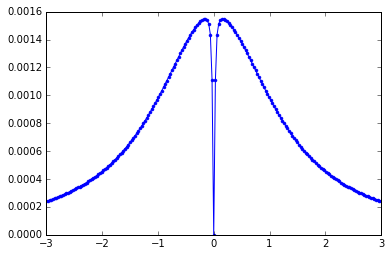

In [4]:
plt.plot(deltalist,prob,'.-')